# <span style="color:brown"> Numerical simulation 12 </span>

## Exercise 12.1

#### <span style="color:black"> Objective </span>

The goal of this exercise was testing different optimizer and seeing how loss and accuracy will change.

#### <span style="color:black"> Result </span>

I tested three different optimizer: SGD, Adam and Adamax.

The SGD is the first model below, it is the most simple optimizer and indeed it was the worst between this three. The loss was the highest, the accuracy the lowest but at least this optimizer didn't show any fluctuation in both previous quantity.
Adam, the second model below, and adamax, the third one, were the most advanced optimizer in this set, their performance was almost the same with a slightly advantage in Adamax's result. If I need to choose one of this for a DNN I will go for Adamax because the loss and accuracy are more stable and with better value. 

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3099 - val_accuracy: 0.9183
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3794 - accuracy: 0.8925 - val_loss: 0.2353 - val_accuracy: 0.9344
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.3057 - accuracy: 0.9133 - val_loss: 0.1997 - val_accuracy: 0.9412
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2664 - accuracy: 0.9255 - val_loss: 0.1729 - val_accuracy: 0.9496
Epoch 5/5
10000/10000 [==============================] - 0s 19us/step

Test loss: 0.15411688969805837
Test accuracy: 0.953499972820282


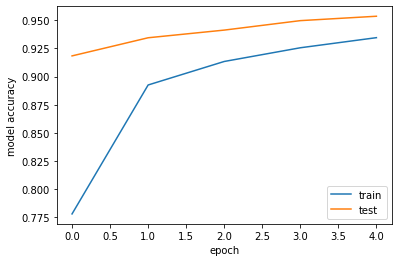

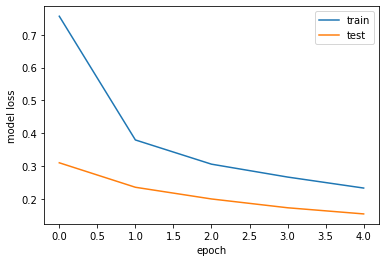

In [104]:
########################################################
##                                                    ##
##            TESTING SGD OPTIMIZER                   ##
##                                                    ##
########################################################

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255



# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model



def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2843 - accuracy: 0.9154 - val_loss: 0.1195 - val_accuracy: 0.9614
Epoch 2/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.1198 - accuracy: 0.9657 - val_loss: 0.0938 - val_accuracy: 0.9709
Epoch 3/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.0863 - accuracy: 0.9746 - val_loss: 0.0843 - val_accuracy: 0.9758
Epoch 4/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0753 - val_accuracy: 0.9799
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step

Test loss: 0.07746680805532379
Test accuracy: 0.9797000288963318


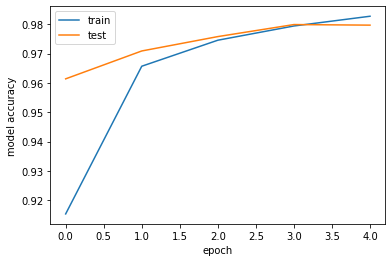

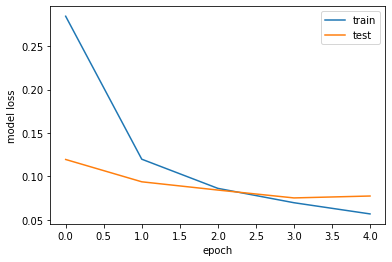

In [113]:
########################################################
##                                                    ##
##            TESTING ADAM OPTIMIZER                  ##
##                                                    ##
########################################################

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255



# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model


# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.3330 - accuracy: 0.9024 - val_loss: 0.1427 - val_accuracy: 0.9568
Epoch 2/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.1537 - accuracy: 0.9568 - val_loss: 0.0980 - val_accuracy: 0.9695
Epoch 3/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.1076 - accuracy: 0.9689 - val_loss: 0.0763 - val_accuracy: 0.9760
Epoch 4/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0862 - accuracy: 0.9754 - val_loss: 0.0704 - val_accuracy: 0.9794
Epoch 5/5
10000/10000 [==============================] - 0s 20us/step

Test loss: 0.06375816629541806
Test accuracy: 0.9799000024795532


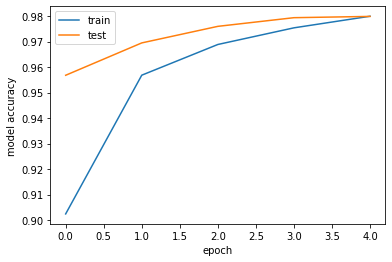

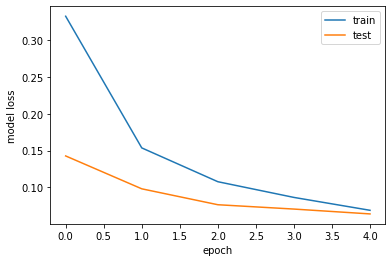

In [108]:
########################################################
##                                                    ##
##            TESTING ADAMAX OPTIMIZER                ##
##                                                    ##
########################################################



import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['accuracy'])
    return model


# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


# Exercise 12.2/12.3

#### <span style="color:black"> Objective </span>

We aim to building a CNN that recognize the hand-written digit, for training and validation we will make use of MNIST library. After that we need to test our net on a samples created by us with use of GIMP application. 

#### <span style="color:black"> Building the net </span>

I took inspiration from the CNN pointed out during the lesson and I tried to keep the net the simplier as I could.
After some try the simpliest CNN with reasonable results was:
- a convolutional layer with $10$ filter 
- a MaxPooling layer with a pool size of $2\times2$.  
- a convolutional layer with $20$ filter
- a MaxPooling layer with a pool size of $2\times2$
- a flatten layer
- a fully connected layer with dimension $30$
- the output layer with dimension $10$

The idea as said before was keeping the net simple. I proceeded in the following way: starting from the first convolutional layer I added a MaxPooling followed by another convolutional with double the filter. The only other hidden layer were a flatten one. The accuracy and loss were good but trying on my handwritten digit the net make 7 guesses out of 10 digit. I threw in another maxpooling after the second convolutional and another fully connected of dimension $30$ before the output layer. This gave me a good result as discussed below.  

#### <span style="color:black"> Result </span>

This net achieved a high grade accuracy and low loss, as example I printed out ten digit with the net's guess and it recognize the right digit all the times. The high accuracy could mean an excess of specification on the MNIST dataset but the net recognize also my digit expect for the four meaning is not completely specified. The bias on the four is because my four handwritting is quite different from the MNIST one. In the last cell is possible to try the net on my digit, it is needed only to change the name of the import file with the digit to test.

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.2298 - accuracy: 0.9317 - val_loss: 0.1123 - val_accuracy: 0.9661
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.0858 - accuracy: 0.9751 - val_loss: 0.0664 - val_accuracy: 0.9789
Epoch 3/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.0632 - accuracy: 0.9807 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 4/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 5/5
10000/10000 [==============================] - 1s 62us/step

Test loss: 0.04300359983021626
Test accuracy: 0.9857000112533569


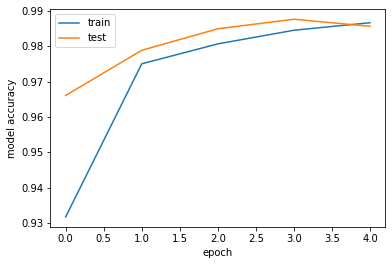

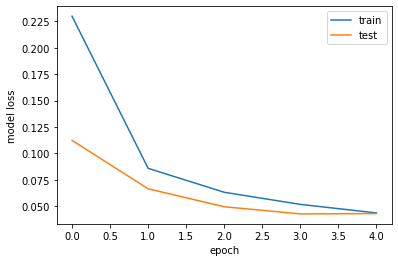

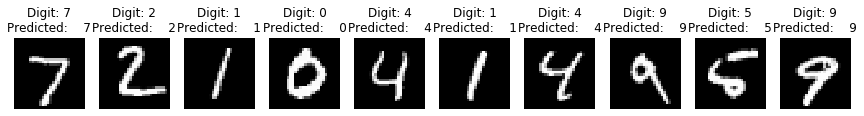

In [137]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(20, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adamax', metrics=['accuracy'])
    return model


# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### The following cell is the one for  tesing model with handwritten digit by me 
(exercise 12.3)

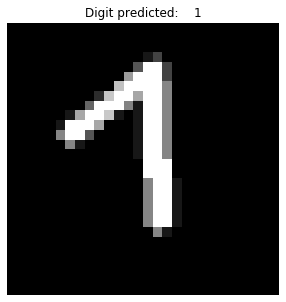

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

digit_filename = "1.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]



data = data.reshape(1,xdim*ydim)

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

digit_filename = "1.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]



data = data.reshape(1,xdim*ydim)

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)
plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()